In [5]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [6]:
RESULT_URL = "https://huggingface.co/henryscheible/experiment_results/raw/main/results_2023-01-11%2004%3A05%3A49.037017.json"

In [7]:
data = json.loads(requests.get(RESULT_URL).text)

In [8]:
data.keys()

dict_keys(['stereoset_binary_bert_classifieronly', 'stereoset_binary_bert_finetuned', 'winobias_bert_classifieronly', 'winobias_bert_finetuned', 'crows_pairs_bert_classifieronly', 'crows_pairs_bert_finetuned'])

In [9]:
checkpoints = list(data.keys())
suffix = "250"
suffixes = [suffix]
checkpoints

['stereoset_binary_bert_classifieronly',
 'stereoset_binary_bert_finetuned',
 'winobias_bert_classifieronly',
 'winobias_bert_finetuned',
 'crows_pairs_bert_classifieronly',
 'crows_pairs_bert_finetuned']

In [14]:
for checkpoint in checkpoints:
    print(f"{checkpoint:<40} : {data[checkpoint][suffix]['base_acc']}")

stereoset_binary_bert_classifieronly     : 0.7480376766091051
stereoset_binary_bert_finetuned          : 0.7605965463108321
winobias_bert_classifieronly             : 0.4717425431711146
winobias_bert_finetuned                  : 0.5353218210361067
crows_pairs_bert_classifieronly          : 0.4654631083202512
crows_pairs_bert_finetuned               : 0.4725274725274725


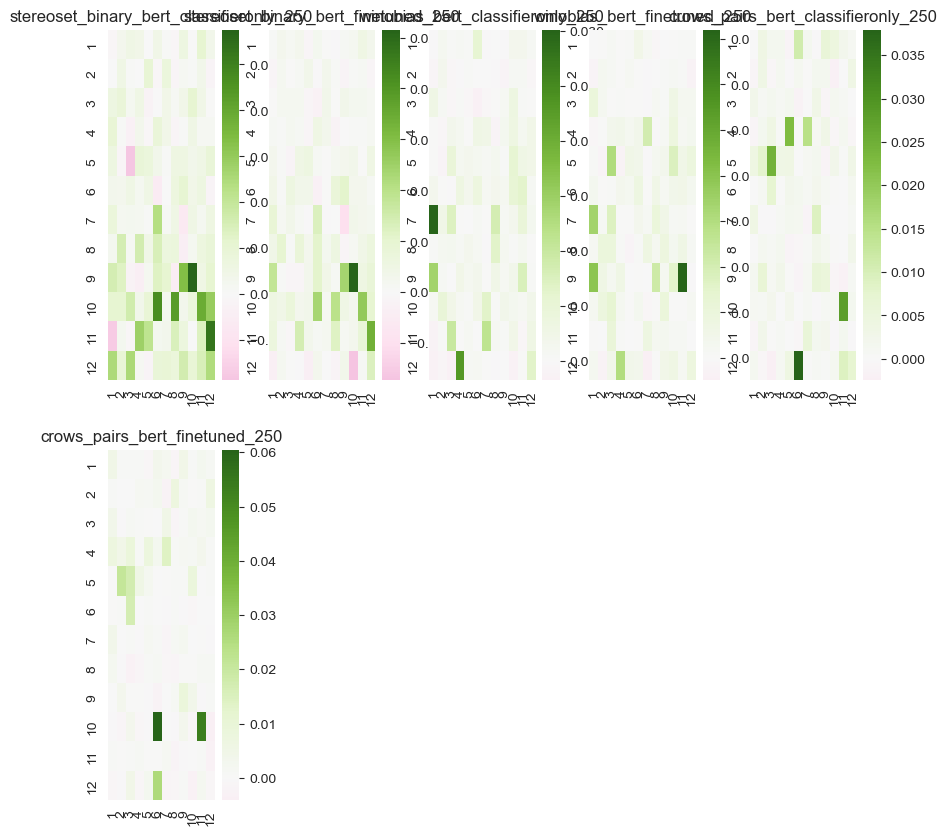

In [43]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    ax = fig.add_subplot(2, len(checkpoints)-1,i+1)
    ax.set_title(f"{checkpoint}_{suffix}")
    sns.heatmap(np.array(data[checkpoint][suffix]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0, xticklabels=range(1,13), yticklabels=range(1,13))
plt.show()

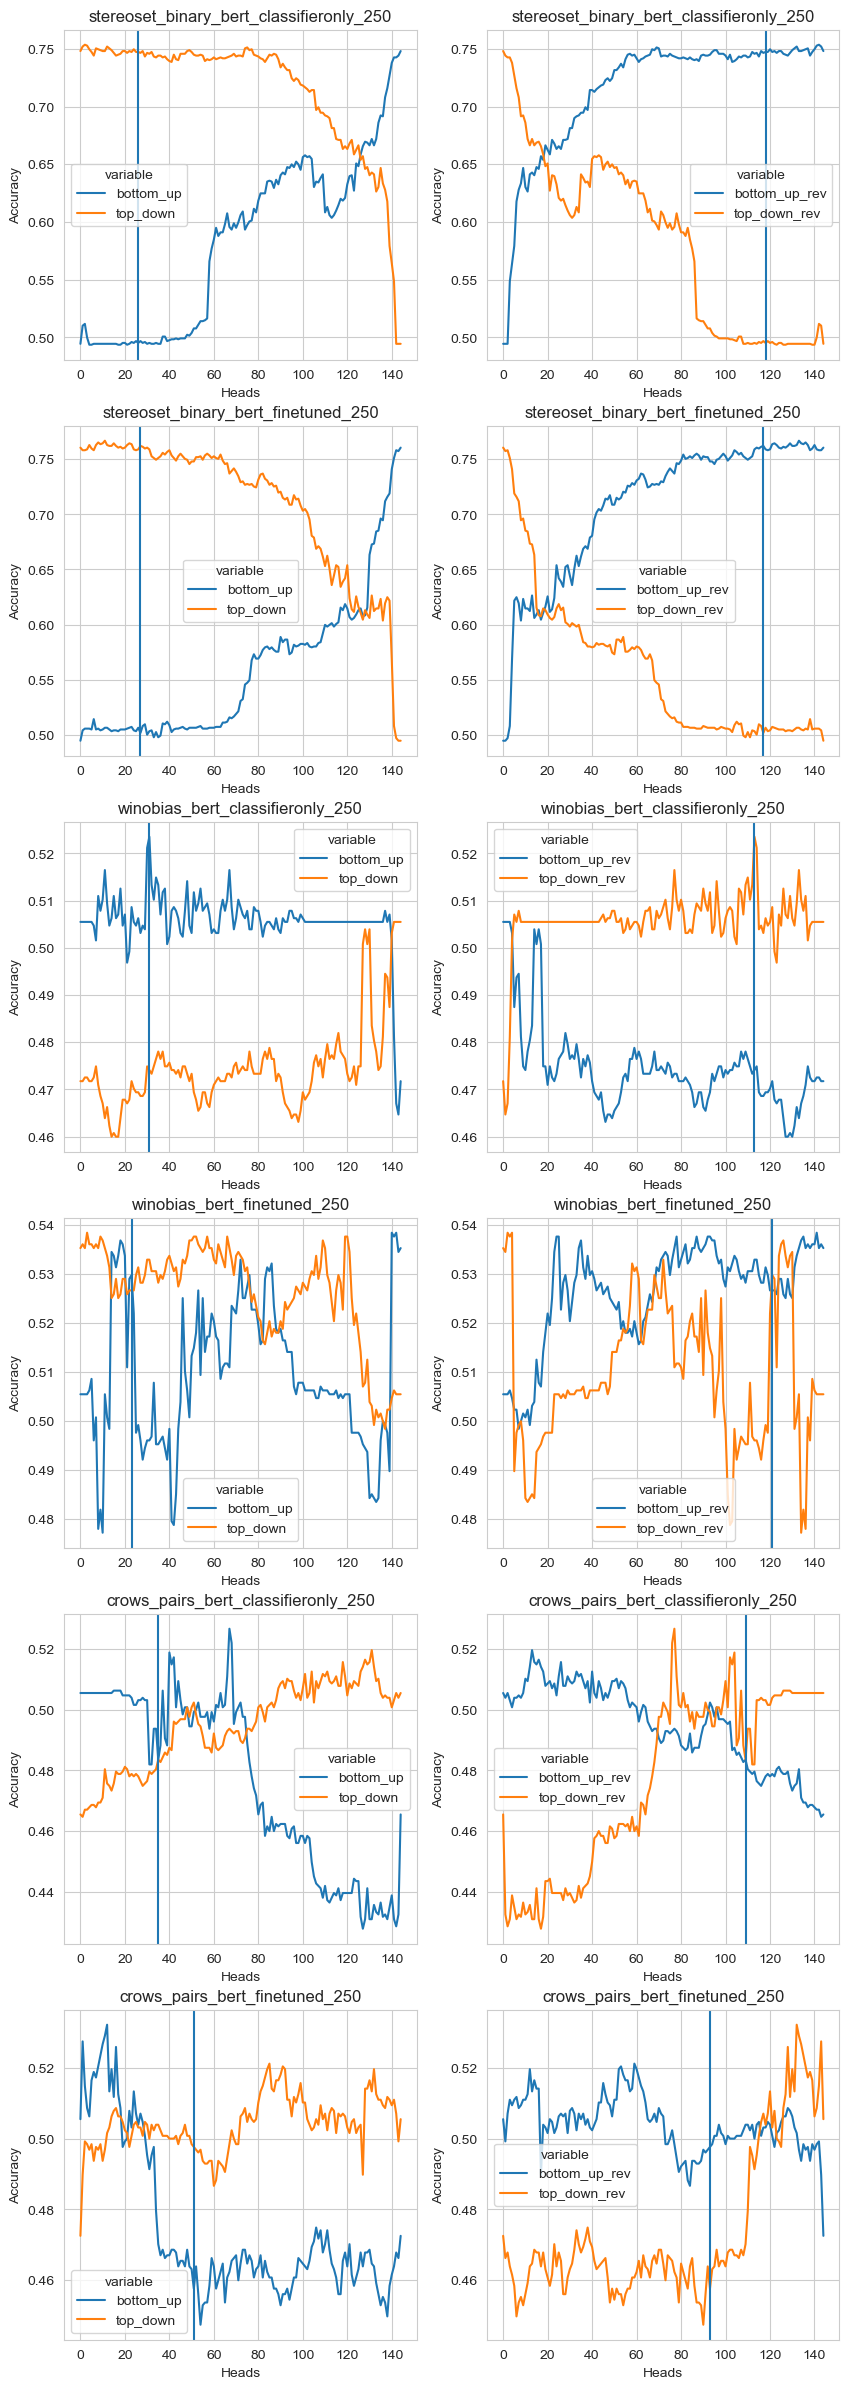

In [48]:
fig = plt.figure(figsize=(10, 30))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(len(checkpoints), 2, 2*i+1)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up': data[checkpoint][suffix]["bottom_up_results"],
            'top_down': data[checkpoint][suffix]["top_down_results"],
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)

        ax = fig.add_subplot(len(checkpoints), 2, 2*i+2)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up_rev': data[checkpoint][suffix]["bottom_up_rev_results"],
            'top_down_rev': data[checkpoint][suffix]["top_down_rev_results"],
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs > 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)

plt.show()